In [2]:
!pip install np_utils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 766.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=1339f2bedca50a05b150917246fd3c7da20c0f3cc670e84ea0e204342ca9b9bd
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [3]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm as maxnorm
from np_utils import np_utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
# Задание начального состояния для воспроизводимости
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Параметры
input_shape = (28, 28, 1)
class_num = 10
epochs = 5
batch_size = 64

In [7]:
# Загрузка и предобработка данных (пример для Fashion MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
# Преобразование данных
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train = np.repeat(x_train, 3, axis=-1)  # Преобразование в формат RGB
x_test = np.repeat(x_test, 3, axis=-1)
x_train = tf.image.resize(x_train, (48, 48))  # Изменение размера изображений под размер входа VGG16
x_test = tf.image.resize(x_test, (48, 48))
x_train = preprocess_input(x_train)  # Предобработка данных для VGG16
x_test = preprocess_input(x_test)

In [9]:
# Преобразование меток в формат one-hot encoding
y_train = to_categorical(y_train, class_num)
y_test = to_categorical(y_test, class_num)

In [10]:
# Загрузка предварительно обученной модели VGG16 без последнего полносвязного слоя и заморозка всех слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
# Создание модели на основе VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_num, activation='softmax'))

In [12]:
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/5
938/938 [==============================] - 2000s 2s/step - loss: 1.2200 - accuracy: 0.7458 - val_loss: 0.4954 - val_accuracy: 0.8216
Epoch 2/5
938/938 [==============================] - 1984s 2s/step - loss: 0.5297 - accuracy: 0.8127 - val_loss: 0.4350 - val_accuracy: 0.8423
Epoch 3/5
938/938 [==============================] - 1965s 2s/step - loss: 0.4722 - accuracy: 0.8294 - val_loss: 0.4212 - val_accuracy: 0.8489
Epoch 4/5
938/938 [==============================] - 1955s 2s/step - loss: 0.4437 - accuracy: 0.8394 - val_loss: 0.4085 - val_accuracy: 0.8537
Epoch 5/5
938/938 [==============================] - 1947s 2s/step - loss: 0.4290 - accuracy: 0.8426 - val_loss: 0.4202 - val_accuracy: 0.8516


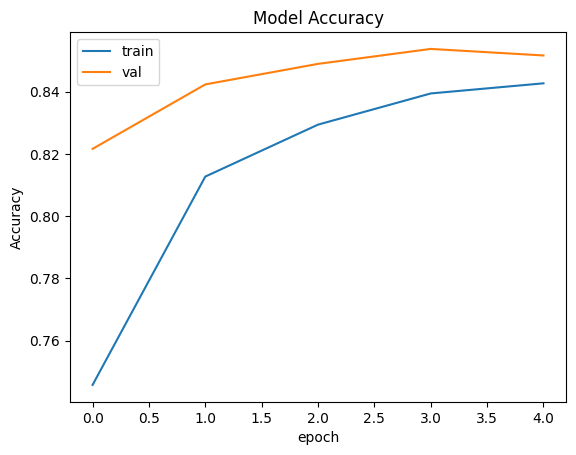

In [17]:
import matplotlib.pyplot as plt

# Accuracy vs Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


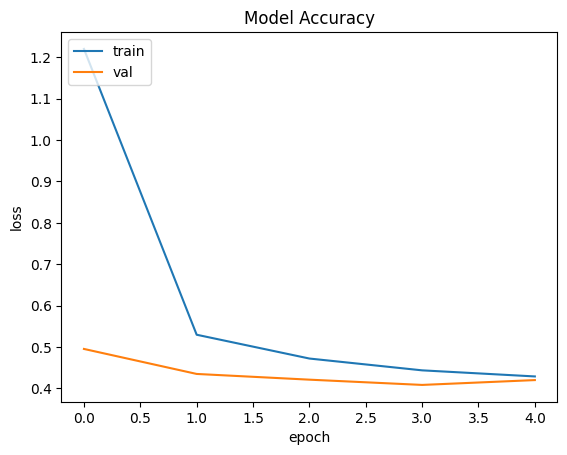

In [18]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [20]:
# Оценка модели
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.16%


1/1 [==============================] - 0s 53ms/step


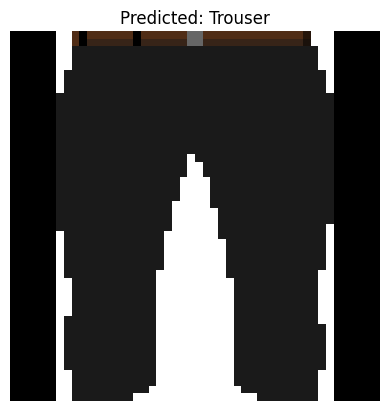

In [82]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

# Функция для предсказания класса объекта на изображении
def predict_image(image_path, model):
    # Загрузка изображения
    img = image.load_img(image_path, target_size=(48, 48))  # Изменение размера изображения под размер входа нейросети
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Предобработка данных для VGG16

    # Предсказание класса
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Описание классов
    desc = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

    # Вывод результата
    plt.imshow(img)
    plt.title(f'Predicted: {desc[predicted_class]}')
    plt.axis('off')
    plt.show()

# Тестирование на локальном изображении
image_path = '/content/drive/MyDrive/Colab/test_images/trouser.png'
predict_image(image_path, model)